In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime

/Users/bebik/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Weinstadt Zeev
## 033363870

### setting and Downloading the tickets

In [2]:
hotels = pd.read_csv('/Users/bebik/Documents/hotels_data.csv')

In [3]:

import datetime

date_time_str = '2018/8/04'
print(hotels['Snapshot Date'][0])
#for index, row in hotels.iterrows():
tabletime = datetime.datetime.strptime( hotels['Snapshot Date'][0] , '%m/%d/%Y %H:%M')
now = datetime.datetime.strptime( date_time_str , '%Y/%m/%d')
newdt = tabletime - now
print (type(newdt))
print ( np.timedelta64(1, 'D').astype(int))


7/17/2015 0:00
<class 'datetime.timedelta'>
1


In [4]:
del hotels['Days'] #always 5
del hotels['Snapshot ID']



In [5]:
hotels.describe()

,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1042.355712,983.618013,1.005191,41.575482,0.846496
min,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [6]:
hotels.describe()


,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1042.355712,983.618013,1.005191,41.575482,0.846496
min,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [7]:
hotels['SnapDate']= pd.to_datetime(hotels['Snapshot Date']) 
hotels['CheckingDate']= pd.to_datetime(hotels['Checkin Date']) 
hotels['weekday']= hotels['CheckingDate'].dt.dayofweek

In [8]:
hotels['DayDiff'] = hotels['CheckingDate']-hotels['SnapDate']
hotels['Discount'] = hotels['Original Price']-hotels['Discount Price']
hotels['DiscountPerc'] = hotels['Discount']/hotels['Original Price']
hotels['delta_days']= (hotels['CheckingDate']- now).astype(int)/8.636207/10**13



## Createing Dendogram
1. calculating the 40 hotels with most checking information
2. add the dates of the 40 hotels to the selected dates
3. create df_df with the 40 X 40 (dates*codes) * hotel ids
4. hotel ids and names are in the hotels DataFrame

In [9]:
import numpy 
vals = numpy.unique(hotels['Hotel Name'].values)
checkins = numpy.unique(hotels['Checkin Date'].values)
hotels_num = numpy.unique(hotels['Hotel Name'].values)
print (type(hotels_num[0]))
#print(checkins,len(checkins))             
#print(hotels_num,len(hotels_num))             
numbers = []
for i in range(len(vals)) :
    numbers.append(i)
print (len(vals),len(numbers) )
hotels['hotel']=hotels['Hotel Name']
hotels['hotel'].replace(to_replace=vals, value=numbers,inplace = True)
hotels.head()

lens = []
for date in checkins:
    xdf = hotels['Checkin Date']==date
    lens.append (len(hotels[xdf]))
lens.sort()


<class 'str'>
554 554


In [10]:
print (lens[len(lens) - 41])
bar = lens[len(lens) - 41]
cnt =0
lista =[]
selected_dates = [] 
df_top40 = pd.DataFrame()
for date in checkins:
    xdf = hotels['Checkin Date']==date
    if (len(hotels[xdf]) > bar):
        selected_dates.append(date)
        cnt+=len(hotels[xdf])
        df_top40 = df_top40.append(hotels[xdf])

print(cnt)
df_top40.describe()

1307
65626


,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,weekday,DayDiff,Discount,DiscountPerc,delta_days,hotel
count,65626.000000,65626.000000,65626.000000,65626.000000,65626.000000,65626.000000,65626,65626.000000,65626.000000,65626.000000,65626.000000
mean,1860.317816,1702.353077,2.438881,15.247783,3.904550,2.861229,17 days 13:30:13.659220,157.964740,0.088780,-1022.561044,288.245192
std,991.594738,931.516379,0.996660,41.035860,0.826034,1.099896,10 days 00:09:07.970866,145.354637,0.057369,31.730086,147.396464
min,300.000000,281.000000,1.000000,-1.000000,0.000000,1.000000,1 days 00:00:00,16.000000,0.010265,-1088.477847,0.000000
25%,1242.000000,1117.000000,2.000000,-1.000000,3.000000,2.000000,9 days 00:00:00,74.000000,0.049460,-1051.461597,175.000000
50%,1670.000000,1527.000000,2.000000,-1.000000,4.000000,3.000000,18 days 00:00:00,112.000000,0.072452,-1012.444468,286.000000
75%,2156.000000,1966.000000,3.000000,8.000000,4.000000,4.000000,26 days 00:00:00,190.000000,0.111111,-998.438319,396.000000
max,10625.000000,10500.000000,4.000000,383.000000,5.000000,5.000000,34 days 00:00:00,2900.000000,0.683057,-948.416359,553.000000


In [11]:
print(selected_dates)

['10/1/2015 0:00', '10/14/2015 0:00', '10/15/2015 0:00', '10/16/2015 0:00', '10/2/2015 0:00', '10/21/2015 0:00', '10/22/2015 0:00', '10/27/2015 0:00', '10/28/2015 0:00', '10/29/2015 0:00', '10/30/2015 0:00', '10/31/2015 0:00', '10/7/2015 0:00', '11/10/2015 0:00', '11/11/2015 0:00', '11/12/2015 0:00', '11/13/2015 0:00', '11/18/2015 0:00', '11/21/2015 0:00', '11/26/2015 0:00', '11/27/2015 0:00', '11/28/2015 0:00', '11/3/2015 0:00', '11/4/2015 0:00', '11/5/2015 0:00', '11/6/2015 0:00', '11/7/2015 0:00', '12/30/2015 0:00', '8/12/2015 0:00', '8/19/2015 0:00', '8/26/2015 0:00', '8/27/2015 0:00', '8/28/2015 0:00', '9/10/2015 0:00', '9/11/2015 0:00', '9/16/2015 0:00', '9/17/2015 0:00', '9/18/2015 0:00', '9/30/2015 0:00', '9/9/2015 0:00']


In [12]:
our_columns =[]
for date in selected_dates:
    our_columns.append(date+'_1')
    our_columns.append(date+'_2')
    our_columns.append(date+'_3')
    our_columns.append(date+'_4')
dandogram_df = pd.DataFrame(columns=our_columns)
print (len(our_columns))

#print ((our_columns))



160


In [13]:
rowsnum = []
cols =[]
for i in range(554):
    rowsnum.append(i)
for date in selected_dates:
    cols.append(date+'_1')
    cols.append(date+'_2')
    cols.append(date+'_3')
    cols.append(date+'_4')

df_df = pd.DataFrame(np.nan,index=rowsnum, columns=cols)
df_df.describe()

,10/1/2015 0:00_1,10/1/2015 0:00_2,10/1/2015 0:00_3,10/1/2015 0:00_4,10/14/2015 0:00_1,10/14/2015 0:00_2,10/14/2015 0:00_3,10/14/2015 0:00_4,10/15/2015 0:00_1,10/15/2015 0:00_2,...,9/18/2015 0:00_3,9/18/2015 0:00_4,9/30/2015 0:00_1,9/30/2015 0:00_2,9/30/2015 0:00_3,9/30/2015 0:00_4,9/9/2015 0:00_1,9/9/2015 0:00_2,9/9/2015 0:00_3,9/9/2015 0:00_4
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_top40.head()
for date in checkins:
    print (date)
    xdf = hotels['Checkin Date']==date
    if (len(hotels[xdf]) > bar):
        for hotelid in range(553):
            
            xdf = df_top40['hotel'] == hotelid
            single_hotel =  df_top40[xdf]
            for x in range(1,4):
                code_x = single_hotel['Discount Code'] == x
                newdff = single_hotel[code_x]
                if (len(newdff) >0 ):
                    row = newdff.iloc[0]
                    row['Original Price']
                    new_col_id = row['Checkin Date']+'_'+str(x)
                    #print (new_col_id)
                    df_df[new_col_id].iloc[hotelid]=row['Original Price']
                    

1/1/2016 0:00
1/10/2016 0:00
1/11/2016 0:00
1/12/2016 0:00
1/13/2016 0:00
1/14/2016 0:00
1/15/2016 0:00
1/16/2016 0:00
1/17/2016 0:00
1/18/2016 0:00
1/19/2016 0:00
1/2/2016 0:00
1/20/2016 0:00
1/21/2016 0:00
1/22/2016 0:00
1/23/2016 0:00
1/24/2016 0:00
1/25/2016 0:00
1/26/2016 0:00
1/27/2016 0:00
1/28/2016 0:00
1/29/2016 0:00
1/3/2016 0:00
1/30/2016 0:00
1/31/2016 0:00
1/4/2016 0:00
1/5/2016 0:00
1/6/2016 0:00
1/7/2016 0:00
1/8/2016 0:00
1/9/2016 0:00
10/1/2015 0:00
10/10/2015 0:00
10/11/2015 0:00
10/12/2015 0:00
10/13/2015 0:00
10/14/2015 0:00
10/15/2015 0:00
10/16/2015 0:00
10/17/2015 0:00
10/18/2015 0:00
10/19/2015 0:00
10/2/2015 0:00
10/20/2015 0:00
10/21/2015 0:00
10/22/2015 0:00
10/23/2015 0:00
10/24/2015 0:00
10/25/2015 0:00
10/26/2015 0:00
10/27/2015 0:00
10/28/2015 0:00
10/29/2015 0:00
10/3/2015 0:00
10/30/2015 0:00
10/31/2015 0:00
10/4/2015 0:00
10/5/2015 0:00
10/6/2015 0:00
10/7/2015 0:00
10/8/2015 0:00
10/9/2015 0:00
11/1/2015 0:00
11/10/2015 0:00
11/11/2015 0:00
11/12/2015

In [15]:
df_df = df_df.fillna(value=-1)
df_df.describe()


,10/1/2015 0:00_1,10/1/2015 0:00_2,10/1/2015 0:00_3,10/1/2015 0:00_4,10/14/2015 0:00_1,10/14/2015 0:00_2,10/14/2015 0:00_3,10/14/2015 0:00_4,10/15/2015 0:00_1,10/15/2015 0:00_2,...,9/18/2015 0:00_3,9/18/2015 0:00_4,9/30/2015 0:00_1,9/30/2015 0:00_2,9/30/2015 0:00_3,9/30/2015 0:00_4,9/9/2015 0:00_1,9/9/2015 0:00_2,9/9/2015 0:00_3,9/9/2015 0:00_4
count,554.000000,554.000000,554.000000,554.0,554.000000,554.000000,554.000000,554.0,554.000000,554.000000,...,554.000000,554.0,554.000000,554.000000,554.000000,554.0,554.000000,554.0,554.0,554.0
mean,175.010830,250.610108,218.182310,-1.0,177.391697,201.851986,231.305054,-1.0,84.925993,83.151625,...,16.974729,-1.0,2.077617,2.187726,10.781588,-1.0,5.951264,-1.0,-1.0,-1.0
std,599.156333,739.028848,713.919063,0.0,607.261666,688.476117,707.978253,0.0,436.585502,368.549459,...,232.368914,0.0,72.438509,75.030150,168.757820,0.0,115.588843,0.0,0.0,0.0
min,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0
25%,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0
50%,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0
75%,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0
max,4346.000000,7475.000000,7475.000000,-1.0,5625.000000,5625.000000,5625.000000,-1.0,6450.000000,2955.000000,...,4400.000000,-1.0,1704.000000,1765.000000,3130.000000,-1.0,1934.000000,-1.0,-1.0,-1.0


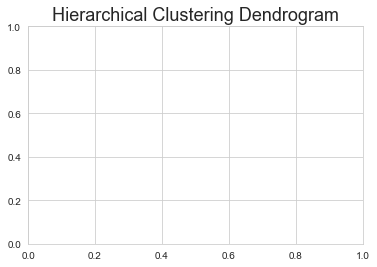

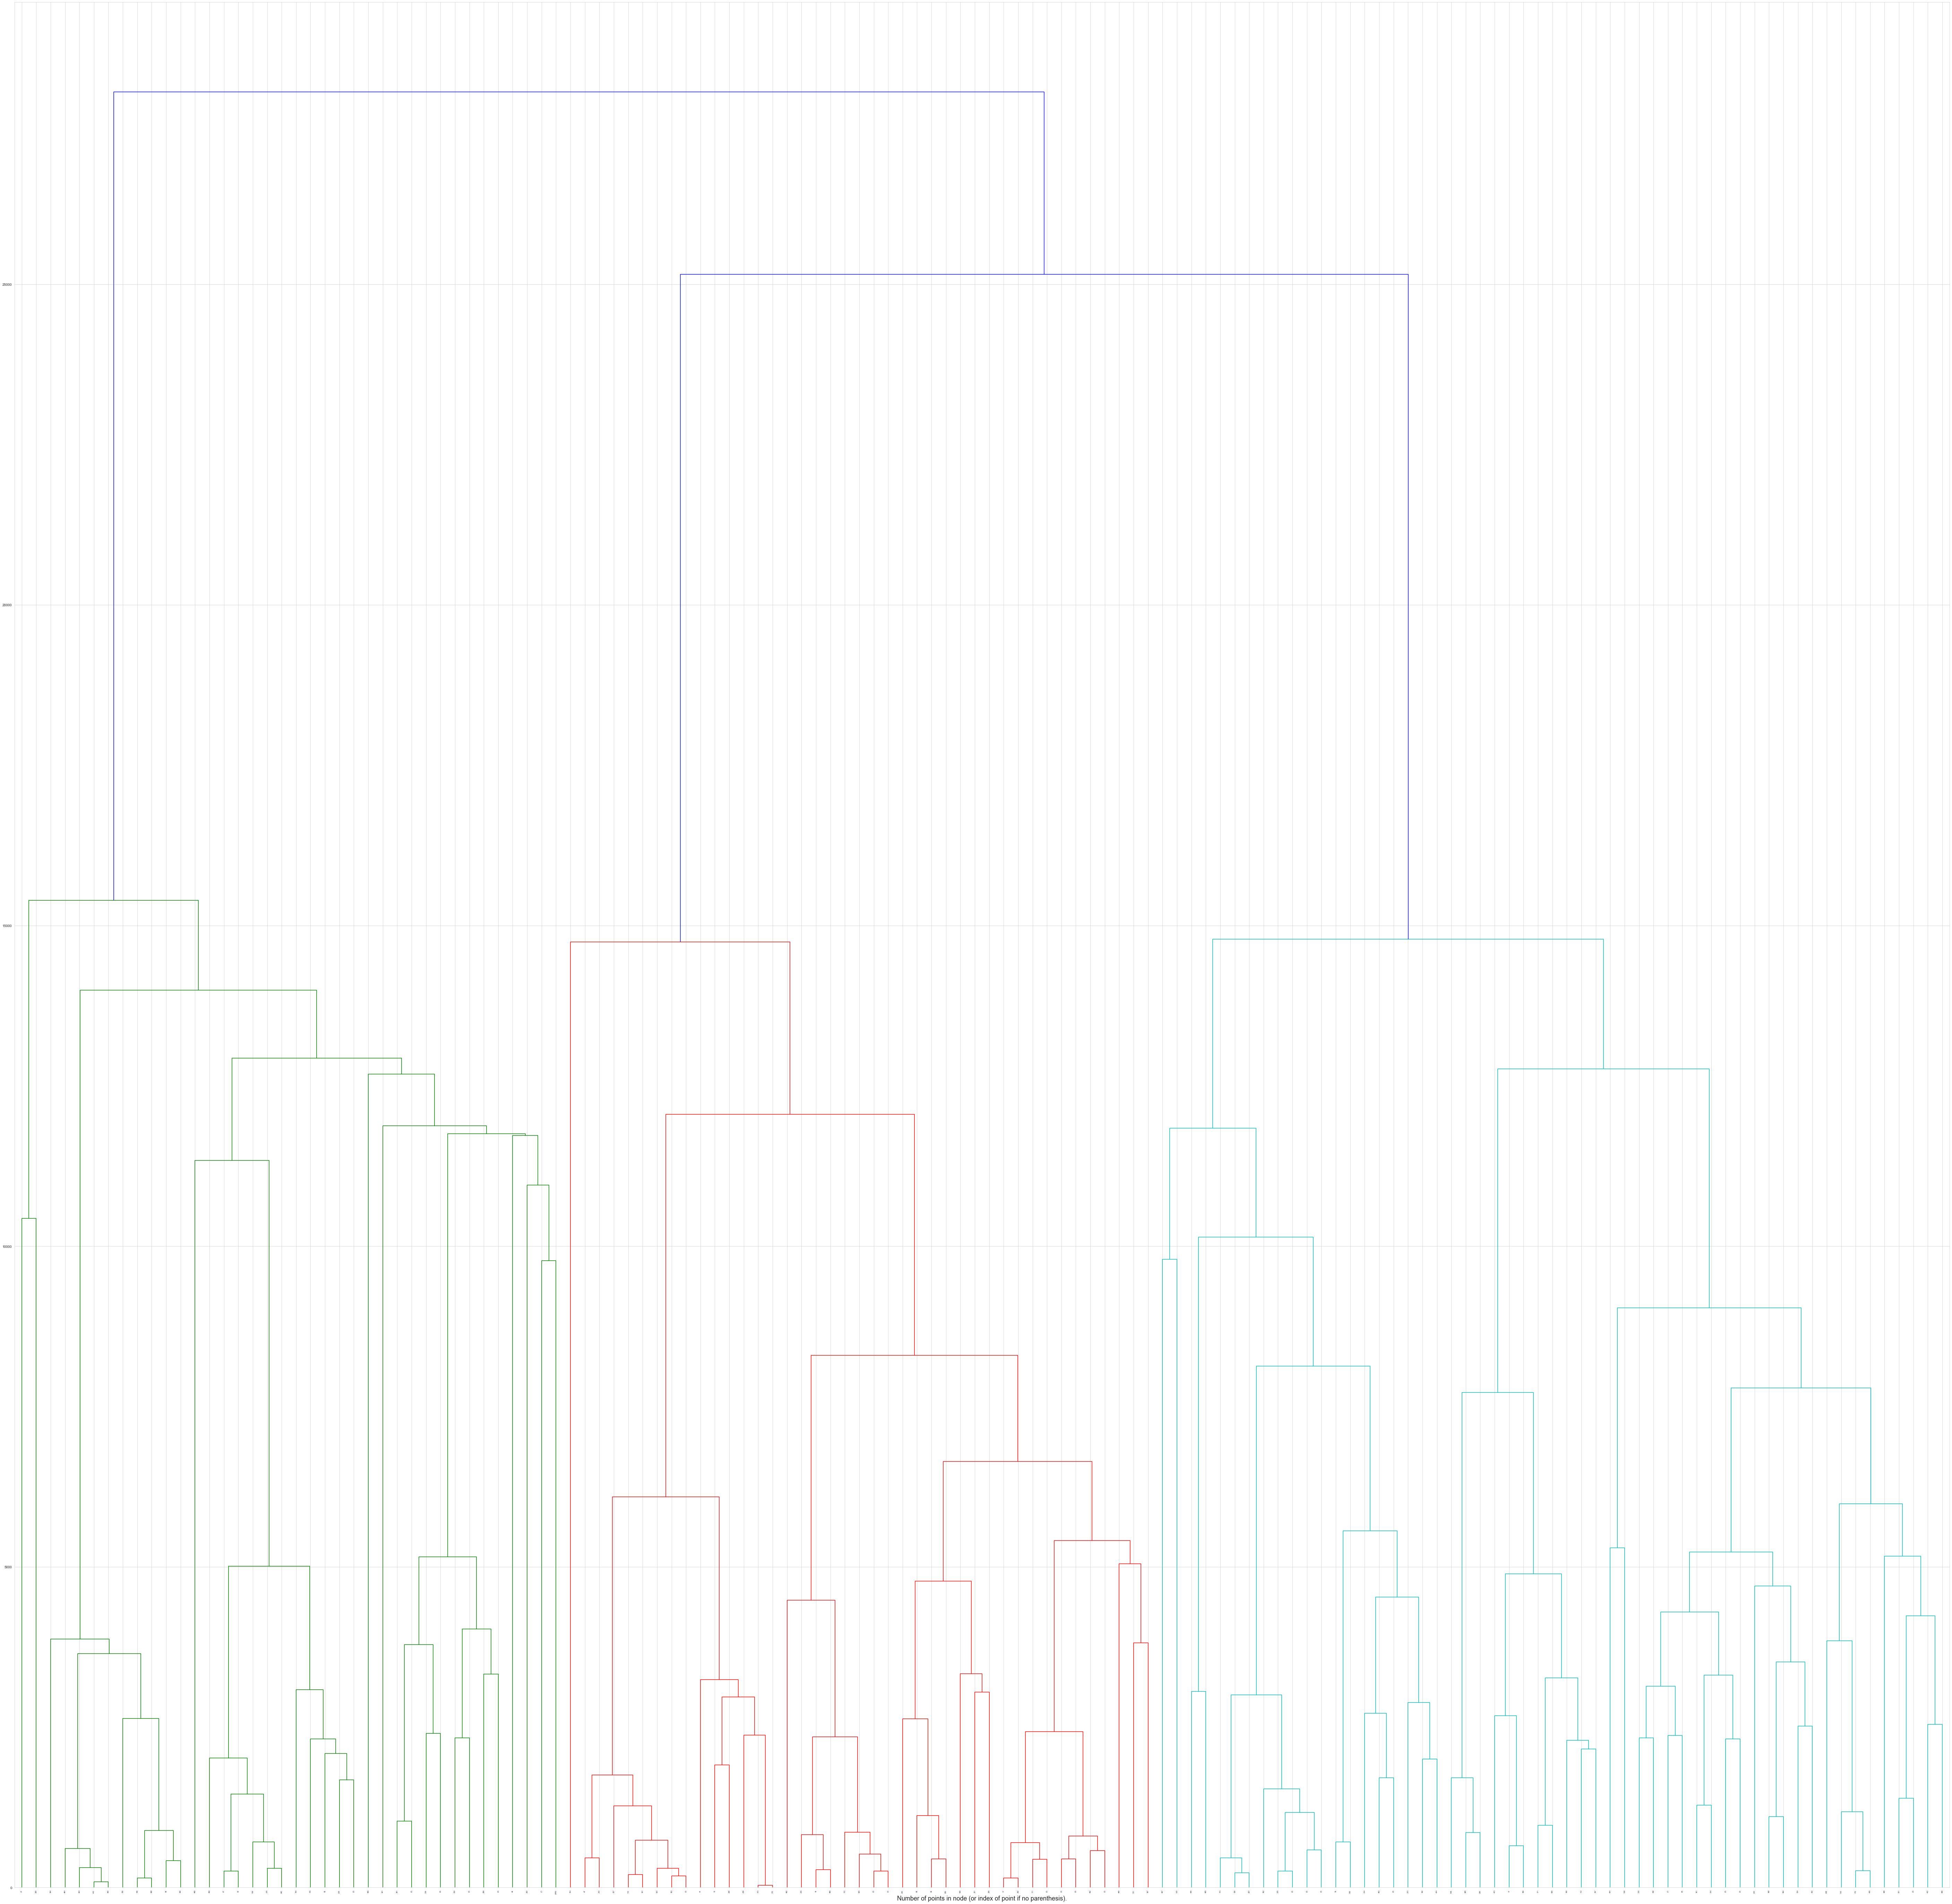

In [16]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_df)
plt.title('Hierarchical Clustering Dendrogram',size=18)

# plot the top three levels of the dendrogram
plt.figure(figsize=(100, 100))




plot_dendrogram(model, truncate_mode='level', p=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).",size=18)
plt.show()

In [17]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#X, y = make_classification(random_state=0)
X = hotels.copy()
y = X['Discount Code']
del X['Hotel Stars']
del X['Discount Code']

#del X['DiscountPerc']



X['days_delta'] = X['DayDiff'].astype('timedelta64[D]')
del X['DayDiff']
del X['Snapshot Date']
del X['Checkin Date']
del X['Hotel Name']
del X['SnapDate']
del X['CheckingDate']
del X['Discount Price']
del X['Discount']

print(X.describe())





       Original Price  Available Rooms        weekday   DiscountPerc  \
count   187848.000000    187848.000000  187848.000000  187848.000000   
mean      1825.742143        14.588561       2.917763       0.088777   
std       1042.355712        41.575482       1.840536       0.060302   
min        289.000000        -1.000000       0.000000       0.005814   
25%       1160.000000        -1.000000       2.000000       0.048450   
50%       1599.000000        -1.000000       3.000000       0.070562   
75%       2160.000000         8.000000       4.000000       0.109339   
max      29975.000000       431.000000       6.000000       0.684258   

          delta_days          hotel     days_delta  
count  187848.000000  187848.000000  187848.000000  
mean    -1017.000038     289.105655      17.465685  
std        47.609346     146.185570      10.040225  
min     -1113.488827       0.000000       1.000000  
25%     -1058.464671     176.000000       9.000000  
50%     -1015.445785     285.0000

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf1 = GradientBoostingClassifier(random_state=0)
clf1.fit(X_train, y_train)
#GradientBoostingClassifier(random_state=0)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
from sklearn import tree
#X, y = load_iris(return_X_y=True)
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X_train, y_train)
#clf2 = clf2.predict(X_test)
#tree.plot_tree(clf2) 
print(clf2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [20]:
#tree.plot_tree(clf2) 

In [21]:
#X_test=X_test.append([2000,2,3,4,5])
#print (len(X_test))
#print (clf.predict(X_test[:1]))
#print (X_test[:1])

#array([1, 0])
#clf.score(X_test, y_test)



In [22]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

import os
pic_size = 256
os.environ['KMP_DUPLICATE_LIB_OK']='True'


class Simple_MLP(nn.Module):
    def __init__(self,size_list):
        super(Simple_MLP,self).__init__()
        layers=[]
        self.size_list = size_list
        for i in range(len(size_list) -2):
            layers.append(nn.Linear(size_list[i],size_list[i+1]))
            op = random.randint(0,2) 
            
            layers.append(torch.nn.PReLU())
        #layers.append(nn.Linear(size_list[-3],size_list[-2]))
        #layers.append(nn.Softmax(dim=1))
        layers.append(nn.Linear(size_list[-2],size_list[-1]))
        self.net = nn.Sequential(*layers)
        
    def forward(self,x):
        return self.net(x)

In [23]:
class HotelsDataset(data.Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self,index):
        X = self.X[index].float()
        Y = self.Y[index].long()
        return X,Y

In [55]:
import pandas as pd
import numpy as np
import torch

def df_to_tensor(df):
    #device = get_device()
    return torch.from_numpy(df.values)
    
def create_set(num,df,target_col):
    print(' target column is ',target_col)
    df_train_sample = df.copy()
    if (num != 0):
        df_train_sample = df_train_sample.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[target_col] )
    ten_train_target = torch.from_numpy(target_sample[target_col].values)
    #print("train_target ",ten_train_target)
    del df_train_sample[target_col]
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)


    #print(ten_train_target)
    train_dataset = HotelsDataset(ten_train_data,ten_train_target)


    train_loader_args = dict(shuffle=True,batch_size=pic_size)
    train_loader = data.DataLoader(train_dataset,**train_loader_args)
    return train_loader

def create_set2(num,df,target_col):
    df_train_sample = df.copy()
    if (num != 0):
        df_train_sample = df_train_sample.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[target_col] )
    ten_train_target = torch.from_numpy(target_sample[target_col].values)
    
    del df_train_sample[target_col]
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)

    return ten_train_data




In [36]:

import random

#criterion = nn.L1Loss()
first_round = 7
#first_round = 5


end_round  = 1
device = torch.device( "cpu")
def create_ar(lens):
    
    r1 = 160
    r2 = 160
    ar = [first_round]
    for i in range(random.randint(1,lens)):
        r1 = random.randint(4,140)
        ar.append( r1  )
        r2 = random.randint(4,140)
        ar.append(  r2 )
    ar.append(end_round)
    return ar


#create next generations
def next_gen(best_ar):
    
    ar_left = []
    ar_right = []
    for index,item in enumerate(best_ar):
        r1 = random.randint(4,140)
        if (index is 0 or index is len(best_ar)-1):
            r1=item
        if (index < len(best_ar)/2 ):
            ar_left.append(item)
            ar_right.append(r1)
        else:
            ar_left.append(r1)
            ar_right.append(item)
    
    return ar_left,ar_right,best_ar



def create_model(ar): 
    print("create_model = ",ar)
    model = Simple_MLP(ar)
    optimizer = optim.Adam(model.parameters())
    print(model)
    return model,optimizer ,ar
ar2=create_ar(10)
model,optimizer ,ar2= create_model(ar2)
next_gen(ar2)

create_model =  [7, 48, 46, 138, 53, 119, 56, 4, 31, 104, 83, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=48, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=48, out_features=46, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=46, out_features=138, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=138, out_features=53, bias=True)
    (7): PReLU(num_parameters=1)
    (8): Linear(in_features=53, out_features=119, bias=True)
    (9): PReLU(num_parameters=1)
    (10): Linear(in_features=119, out_features=56, bias=True)
    (11): PReLU(num_parameters=1)
    (12): Linear(in_features=56, out_features=4, bias=True)
    (13): PReLU(num_parameters=1)
    (14): Linear(in_features=4, out_features=31, bias=True)
    (15): PReLU(num_parameters=1)
    (16): Linear(in_features=31, out_features=104, bias=True)
    (17): PReLU(num_parameters=1)
    (18): Linear(in_features=104, out_features=83, bias

([7, 48, 46, 138, 53, 119, 94, 8, 73, 77, 35, 1],
 [7, 118, 19, 48, 67, 103, 56, 4, 31, 104, 83, 1],
 [7, 48, 46, 138, 53, 119, 56, 4, 31, 104, 83, 1])

In [26]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms

import matplotlib.pyplot as plt

import os
def create_data_loader(df,target_col):
    target = pd.DataFrame(df[ target_col] )
    #print(target)
    ten_target = torch.from_numpy(target[target_col].values)
    df = df.drop(target_col ,axis=1 )
    ten_data = df_to_tensor(df)
    #print (ten_data)

    _dataset = HotelsDataset(ten_data,ten_target)



#    test_loader_args = dict(shuffle=True,batch_size=pic_size,num_workers=0,pin_memory=True) if cuda\
#    else 
    test_loader_args = dict(shuffle=True,batch_size=pic_size)
    loader = data.DataLoader(_dataset,**test_loader_args)
    return ten_target,loader



In [42]:
df_train = hotels.copy()
del df_train['DayDiff']
del df_train['Snapshot Date']
#hotels_df['SnapshotUnixDate']  = pd.to_datetime(hotels_df['Snapshot Date'])

del df_train['Checkin Date']
del df_train['Hotel Name']
del df_train['SnapDate']
del df_train['CheckingDate']


target_columns = 'DiscountPerc'
#target_columns = 'Discount Price'
from sklearn.model_selection import train_test_split

df_train, df_validate = train_test_split(df_train, test_size=0.2)
df_train2 = df_train.copy()
#print(df_validate.describe())
ten_target,loader = create_data_loader(df_train2,target_columns)
#df_validate =  df_train.sample(n = 10000)


df_validate = df_validate.drop("Discount Price" ,axis=1 )
df_validate = df_validate.drop("Discount" ,axis=1 )
validate_target, validate_loader = create_data_loader(df_validate,target_columns)
#df_train.describe()

## Evolutionary algorithm with Deep networks

1. Starting with random network with Relu activation functions.
2. each generation take the 
    a. original
    b. left original + random   right
    c. left random   + original right
    d. random (with random size)

In [57]:
import time
def train_epoch(model,train_loader,criterion,optimizer):
    #print(1)
    model.train()
    model.to(device)
    running_loss=0.0
    
    start_time = time.time()
    for batch_idx, (data,target) in enumerate(train_loader):
        
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        outputs = model(data)
        
        target = target.unsqueeze(1)
        target = target.float() 
        
        
        loss = criterion(outputs,target)
        running_loss += loss.item()
        #print("Train Loss item: ", loss.item() )
        #print (outputs)
        loss.backward()
        optimizer.step()
    
    end_time = time.time()   
    running_loss /= len(train_loader)
    print("Train Loss: ", running_loss, ' Time: ', end_time-start_time)
    return running_loss




In [29]:
def test_epoch(model,test_loader,criterion):
    with torch.no_grad():
        #print(1)
        model.eval()
        model.to(device)
        
        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        #print(2)
        
        for batch_idx, (data,target) in enumerate(test_loader):
            #print(3)
            data = data.to(device)
            target = target.to(device)
            outputs = model(data)
            #print(outputs)
            #_, predicted = torch.max(outputs.data,1)
            #print(predicted)
            #total_predictions += target.size(0)
            #correct_predictions += (predicted==target).sum().item()
            
            loss = criterion(outputs,target).detach()
            running_loss += loss.item()
        running_loss /= len(test_loader)
        return running_loss

# run the algorithm 

In [44]:
#df_train_bkup = df_train.copy()

#df_train = df_train.drop("Available Rooms" ,axis=1 )
#df_train = df_train.drop("Discount Code" ,axis=1 )
#df_train = df_train.drop("Hotel Stars" ,axis=1 )
#df_train = df_train.drop("weekday" ,axis=1 )
#df_train = df_train.drop("Discount" ,axis=1 )
#df_train = df_train.drop("delta_days" ,axis=1 )
df_train = df_train.drop("Discount Price" ,axis=1 )


df_train = df_train.drop("Discount" ,axis=1 )


df_train.head(100)



,Original Price,Discount Code,Available Rooms,Hotel Stars,weekday,DiscountPerc,delta_days,hotel
116654,1543,3,9,4,5,0.057032,-980.430413,355
128699,557,2,15,2,4,0.077199,-974.427778,363
175393,692,3,-1,3,4,0.053468,-932.409332,223
78202,659,3,2,3,3,0.094082,-1010.443589,149
3565,1156,1,-1,4,2,0.348616,-1081.474772,327
...,...,...,...,...,...,...,...,...
162260,761,3,-1,3,1,0.101183,-942.413724,544
41303,1911,2,-1,3,4,0.188383,-1051.461597,187
116558,1495,2,1,4,2,0.066890,-1004.440954,412
34774,2265,2,-1,4,3,0.105960,-1031.452813,324


In [60]:
df_train.describe()

,Original Price,Discount Code,Available Rooms,Hotel Stars,weekday,DiscountPerc,delta_days,hotel
count,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000
mean,1824.760843,2.433450,14.641651,3.904670,2.916302,0.088725,-1017.108848,289.108825
std,1037.708876,1.005736,41.769681,0.846419,1.839818,0.060238,47.579270,146.042247
min,289.000000,1.000000,-1.000000,0.000000,0.000000,0.005814,-1113.488827,0.000000
25%,1160.000000,2.000000,-1.000000,3.000000,2.000000,0.048485,-1058.464671,176.000000
50%,1600.000000,2.000000,-1.000000,4.000000,3.000000,0.070562,-1015.445785,285.000000
75%,2157.000000,3.000000,8.000000,4.000000,4.000000,0.109339,-982.431292,397.000000
max,17200.000000,4.000000,431.000000,5.000000,6.000000,0.666158,-912.400548,553.000000


In [74]:

n_epoch = 6
Train_loss = []
Test_loss = []
Test_acc = []

#model2,optimizer2 = create_model()
acc1 =0
acc2 =0

arx = create_ar(8)
best , ar1,ar2 = next_gen(arx)
#This is the 4 models that we are working on 
loops = [best,ar1,ar2,arx]

target_columns='DiscountPerc'
#target_columns = 'perc'
results =[]
best_score =100
best_index =-1
a,b,best =[],[],[]
for generations in range (2):
    #plt.plot(Test_acc)
    #Loop over the models and choose the best one.
    for index in range(4):
        criterion = nn.MSELoss()
        #criterion = nn.CrossEntropyLoss()
        model ,optimizer ,ar = create_model(loops[index])
        temp_model = model
        temp_optimizer = optimizer
       
        for i in range(n_epoch):
            #print (df_train.head())
            train_loader = create_set(10000,df_train,target_columns)
            #print(df_train.head())
            train_loss = train_epoch(temp_model,train_loader,criterion,temp_optimizer)
            test_loss = test_epoch(temp_model,validate_loader,criterion)
            
            #Train_loss.append(train_loss)
            Test_loss.append(test_loss)
            print("train loss",train_loss)
            print("test loss" , test_loss)
            #Test_acc.append(test_acc)
            print('='*50,'gen=',generations,'index',i,'vector=',index)
        
        if (test_loss < best_score):
            print ("updating model ======= ", test_loss)
            best_model = temp_model
            best_optimizer = temp_optimizer
            best_score = test_loss
            best_index = index
        
        results.append(test_loss)
    
    
    a,b,best = next_gen(loops[index])
    c=create_ar(8)
    results =[]
    
    



    

create_model =  [7, 84, 59, 67, 30, 117, 11, 47, 122, 80, 8, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=84, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=84, out_features=59, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=59, out_features=67, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=67, out_features=30, bias=True)
    (7): PReLU(num_parameters=1)
    (8): Linear(in_features=30, out_features=117, bias=True)
    (9): PReLU(num_parameters=1)
    (10): Linear(in_features=117, out_features=11, bias=True)
    (11): PReLU(num_parameters=1)
    (12): Linear(in_features=11, out_features=47, bias=True)
    (13): PReLU(num_parameters=1)
    (14): Linear(in_features=47, out_features=122, bias=True)
    (15): PReLU(num_parameters=1)
    (16): Linear(in_features=122, out_features=80, bias=True)
    (17): PReLU(num_parameters=1)
    (18): Linear(in_features=80, out_features=8, bias=T

/Users/bebik/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/bebik/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([194])) that is different to the input size (torch.Size([194, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


train loss 0.0023671102539992717
test loss 5.6598500698467485e-05
================================================== gen= 0 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  3.108921114289842e-05  Time:  0.336622953414917
train loss 3.108921114289842e-05
test loss 2.427205193574385e-05
================================================== gen= 0 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  2.1516499828067026e-05  Time:  0.35550498962402344
train loss 2.1516499828067026e-05
test loss 3.045503984628717e-05
================================================== gen= 0 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  2.0098875643270732e-05  Time:  0.3401200771331787
train loss 2.0098875643270732e-05
test loss 3.651633567048465e-05
================================================== gen= 0 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  1.8678336482480516e-05  Time:  0.31573915481567383
train loss 1.8678336482480516e-05
test loss 1.7039501

Train Loss:  5.9193327173190366e-08  Time:  0.38755202293395996
train loss 5.9193327173190366e-08
test loss 4.6486100350781505e-08
================================================== gen= 0 index 3 vector= 3
 target column is  DiscountPerc
Train Loss:  3.9250856920247655e-08  Time:  0.34207987785339355
train loss 3.9250856920247655e-08
test loss 3.417794581892992e-08
================================================== gen= 0 index 4 vector= 3
 target column is  DiscountPerc
Train Loss:  2.7849919748135222e-08  Time:  0.38727712631225586
train loss 2.7849919748135222e-08
test loss 2.7763739691242498e-08
================================================== gen= 0 index 5 vector= 3
updating model =======  2.7763739691242498e-08
create_model =  [7, 84, 59, 67, 30, 117, 11, 47, 122, 80, 8, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=84, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=84, out_features=59, bias=True)
    (3): PReLU(num_p

Train Loss:  0.0007079171402665452  Time:  0.3491508960723877
train loss 0.0007079171402665452
test loss 7.4571346261041225e-06
================================================== gen= 1 index 0 vector= 3
 target column is  DiscountPerc
Train Loss:  4.811469295873394e-06  Time:  0.3769209384918213
train loss 4.811469295873394e-06
test loss 8.677615977255615e-07
================================================== gen= 1 index 1 vector= 3
 target column is  DiscountPerc
Train Loss:  5.957232900755116e-07  Time:  0.4100639820098877
train loss 5.957232900755116e-07
test loss 4.331499564527587e-07
================================================== gen= 1 index 2 vector= 3
 target column is  DiscountPerc
Train Loss:  3.026585215337718e-07  Time:  0.41974592208862305
train loss 3.026585215337718e-07
test loss 2.671829368906327e-07
================================================== gen= 1 index 3 vector= 3
 target column is  DiscountPerc
Train Loss:  2.2674752386819819e-07  Time:  0.360755205154

In [ ]:
# train the best algoritm more cycles
m = nn.Linear(9,1)
input = torch.randn(9)
output = m(input)
print (input,output)

In [ ]:
loss = nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)
output.backward()
print(output)

In [75]:
for i in range(10):
            train_loader = create_set(50000,df_train,target_columns)
            train_loss = train_epoch(best_model,train_loader,criterion,best_optimizer)
            test_loss = test_epoch(best_model,validate_loader,criterion)

            
            Train_loss.append(train_loss)
            Test_loss.append(test_loss)
      
            print('='*50,i)



 target column is  DiscountPerc
Train Loss:  1.9884072764737037e-08  Time:  1.9143707752227783
================================================== 0
 target column is  DiscountPerc
Train Loss:  1.2244845296446475e-08  Time:  1.7058110237121582
================================================== 1
 target column is  DiscountPerc
Train Loss:  9.19684769610082e-09  Time:  1.6433241367340088
================================================== 2
 target column is  DiscountPerc
Train Loss:  8.075108552351594e-09  Time:  1.6404359340667725
================================================== 3
 target column is  DiscountPerc
Train Loss:  6.633043937238988e-09  Time:  1.6534032821655273
================================================== 4
 target column is  DiscountPerc
Train Loss:  7.358921114198914e-09  Time:  1.6968629360198975
================================================== 5
 target column is  DiscountPerc
Train Loss:  6.233274138341892e-09  Time:  1.7265360355377197
=======================

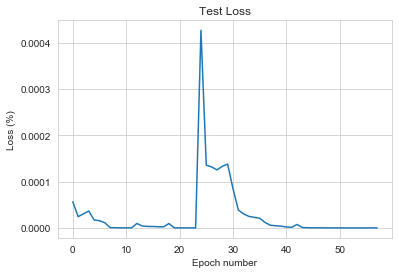

In [76]:
plt.title('Test Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss (%)')
plt.plot(Test_loss)


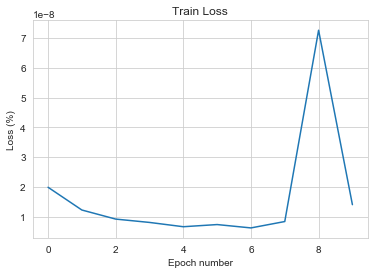

In [77]:
plt.title('Train Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss (%)')
plt.plot(Train_loss)

In [ ]:
X = df_train.sample(n=10000)

X.describe()

create_set2(100,X,target_columns)
res = best_model(df_to_tensor(X)[0])
print (len(res))

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = df_train2.fillna(value=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X )
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [ 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 
 
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
      
    # Getting length of list 
    length = len(cluster_labels) 
    i = 0
    j=0
    dfdisplay = pd.DataFrame()
    # Iterating using while loop 
    for i in range(n_clusters):
        print (" cluster "+str(i) )
        for j in range(length):
           # print (type (int (cluster_labels[i] )  ) ,end = ",")
            if  cluster_labels[j]  == i:
                print(tech_list[j],end = ',')
                #globals()[tech_list[j]][tech_list[j]].plot(figsize=(10,4))
        print('')
        
    

In [ ]:
print ("cluster 0 graph")
for j in range(length):
     if  cluster_labels[j]  == 0:
            globals()[tech_list[j]][tech_list[j]].plot(figsize=(10,4))

        

In [ ]:

print ("cluster 1 graph")
for j in range(length):
     if  cluster_labels[j]  == 1:
            globals()[tech_list[j]][tech_list[j]].plot(figsize=(10,4))



In [ ]:

print ("cluster 2 graph")
for j in range(length):
     if  cluster_labels[j]  == 2:
            globals()[tech_list[j]][tech_list[j]].plot(figsize=(10,4))




In [ ]:

print ("cluster 3 graph")
for j in range(length):
     if  cluster_labels[j]  == 5:
            globals()[tech_list[j]][tech_list[j]].plot(figsize=(10,4))




## Corona analysis
we can see that cluster 0 and 3 didnt crossed the -0.2 and the fix was the same.
cluster 1 was mainly rounding between -0.3 and 0.3 
cluster 2 was rounding between -0.35 and 0.35
however cluster 3 was having fluctuation also long before march , at august and november last year 

## checking silhouette score for different k means

In [ ]:
#tech_list.remove('EW')
#print (tech_list)


#checking silhouette score :

df_without_ew = pd.DataFrame([ MSFT['MSFT'],AAPL['AAPL'],AMZN['AMZN'],FB['FB'],GOOG['GOOG'],JNJ['JNJ'],V['V'],JPM['JPM'],PG['PG'],UNH['UNH'],INTC['INTC'],HD['HD'],MA['MA'],VZ['VZ'],T['T'],NVDA['NVDA'],DIS['DIS'],PFE['PFE'],MRK['MRK'],NFLX['NFLX'],CSCO['CSCO'],XOM['XOM'],BAC['BAC'],ADBE['ADBE'],PEP['PEP'],WMT['WMT'],CMCSA['CMCSA'],KO['KO'],PYPL['PYPL'],CVX['CVX'],ABBV['ABBV'],ABT['ABT'],CRM['CRM'],BMY['BMY'],MCD['MCD'],TMO['TMO'],AMGN['AMGN'],COST['COST'],LLY['LLY'],MDT['MDT'],ACN['ACN'],NKE['NKE'],UNP['UNP'],ORCL['ORCL'],NEE['NEE'],PM['PM'],AVGO['AVGO'],TXN['TXN'],IBM['IBM'],LIN['LIN'],AMT['AMT'],DHR['DHR'],HON['HON'],C['C'],WFC['WFC'],GILD['GILD'],LOW['LOW'],SBUX['SBUX'],LMT['LMT'],QCOM['QCOM'],RTX['RTX'],MMM['MMM'],FIS['FIS'],CVS['CVS'],CHTR['CHTR'],BLK['BLK'],SPGI['SPGI'],INTU['INTU'],BA['BA'],VRTX['VRTX'],NOW['NOW'],MDLZ['MDLZ'],ANTM['ANTM'],CI['CI'],MO['MO'],UPS['UPS'],BKNG['BKNG'],TJX['TJX'],D['D'],BDX['BDX'],CME['CME'],AMD['AMD'],PLD['PLD'],ISRG['ISRG'],CAT['CAT'],CCI['CCI'],ZTS['ZTS'],AXP['AXP'],CL['CL'],TGT['TGT'],DUK['DUK'],SYK['SYK'],FISV['FISV'],ADP['ADP'],GS['GS'],EQIX['EQIX'],GE['GE'],SO['SO'],ATVI['ATVI'],BIIB['BIIB'],GPN['GPN'],CSX['CSX'],MMC['MMC'],HUM['HUM'],APD['APD'],NEM['NEM'],ICE['ICE'],NOC['NOC'],ILMN['ILMN'],CB['CB'],AMAT['AMAT'],ECL['ECL'],MU['MU'],BSX['BSX'],COP['COP'],ITW['ITW'],KMB['KMB'],MS['MS'],SHW['SHW'],USB['USB'],DG['DG'],AON['AON'],PNC['PNC'],DE['DE'],REGN['REGN'],TFC['TFC'],NSC['NSC'],BAX['BAX'],PGR['PGR'],ADSK['ADSK'],MCO['MCO'],ADI['ADI'],LHX['LHX'],EL['EL'],WM['WM'],AEP['AEP'],CNC['CNC'],SCHW['SCHW'],ROP['ROP'],LRCX['LRCX'],DXCM['DXCM'],DD['DD'],GIS['GIS'],TMUS['TMUS'],EXC['EXC'],ROST['ROST'],DLR['DLR'],EA['EA'],PSX['PSX'],EMR['EMR'],SRE['SRE'],GD['GD'],EBAY['EBAY'],GM['GM'],ETN['ETN'],SBAC['SBAC'],XEL['XEL'],ORLY['ORLY'],ALL['ALL'],EOG['EOG'],WBA['WBA'],KMI['KMI'],BK['BK'],STZ['STZ'],HCA['HCA'],COF['COF'],CTSH['CTSH'],MSCI['MSCI'],FDX['FDX'],PSA['PSA'],KLAC['KLAC'],WEC['WEC'],VLO['VLO'],INFO['INFO'],TROW['TROW'],SYY['SYY'],APH['APH'],YUM['YUM'],DOW['DOW'],AZO['AZO'],MET['MET'],CMG['CMG'],MNST['MNST'],IQV['IQV'],WLTW['WLTW'],KR['KR'],TRV['TRV'],AFL['AFL'],VRSK['VRSK'],TEL['TEL'],ES['ES'],HPQ['HPQ'],ZBH['ZBH'],IDXX['IDXX'],SNPS['SNPS'],TWTR['TWTR'],A['A'],CLX['CLX'],AIG['AIG'],MAR['MAR'],SLB['SLB'],CMI['CMI'],CDNS['CDNS'],PEG['PEG'],ROK['ROK'],MSI['MSI'],MCK['MCK'],PCAR['PCAR'],WMB['WMB'],ED['ED'],MPC['MPC'],PRU['PRU'],RMD['RMD'],ANSS['ANSS'],JCI['JCI'],PPG['PPG'],ALXN['ALXN'],FAST['FAST'],XLNX['XLNX'],HLT['HLT'],F['F'],FE['FE'],VRSN['VRSN'],AWK['AWK'],AVB['AVB'],PAYX['PAYX'],PH['PH'],STT['STT'],OTIS['OTIS'],CERN['CERN'],MCHP['MCHP'],BLL['BLL'],MKC['MKC'],FLT['FLT'],FTNT['FTNT'],EQR['EQR'],EIX['EIX'],CTAS['CTAS'],PPL['PPL'],ADM['ADM'],TT['TT'],SWKS['SWKS'],DTE['DTE'],ETR['ETR'],DLTR['DLTR'],AME['AME'],HSY['HSY'],WELL['WELL'],KEYS['KEYS'],SWK['SWK'],TDG['TDG'],VFC['VFC'],KHC['KHC'],CTVA['CTVA'],APTV['APTV'],ARE['ARE'],MKTX['MKTX'],DHI['DHI'],BBY['BBY'],O['O'],CPRT['CPRT'],EFX['EFX'],MTD['MTD'],TSN['TSN'],INCY['INCY'],CHD['CHD'],SPG['SPG'],FTV['FTV'],RSG['RSG'],ALGN['ALGN'],AEE['AEE'],AJG['AJG'],AMP['AMP'],LH['LH'],FRC['FRC'],LEN['LEN'],LVS['LVS'],GLW['GLW'],AKAM['AKAM'],TFX['TFX'],CARR['CARR'],CTXS['CTXS'],NTRS['NTRS'],CAG['CAG'],LUV['LUV'],WST['WST'],CAH['CAH'],CMS['CMS'],LYB['LYB'],TTWO['TTWO'],CDW['CDW'],PXD['PXD'],ESS['ESS'],AMCR['AMCR'],K['K'],MXIM['MXIM'],DGX['DGX'],ODFL['ODFL'],OKE['OKE'],DPZ['DPZ'],KSU['KSU'],WY['WY'],JKHY['JKHY'],COO['COO'],HOLX['HOLX'],ABC['ABC'],IFF['IFF'],CBRE['CBRE'],TIF['TIF'],PAYC['PAYC'],BR['BR'],HPE['HPE'],DAL['DAL'],EVRG['EVRG'],HIG['HIG'],VMC['VMC'],STE['STE'],LDOS['LDOS'],KMX['KMX'],ZBRA['ZBRA'],DOV['DOV'],NDAQ['NDAQ'],IP['IP'],MAA['MAA'],GWW['GWW'],FCX['FCX'],TSCO['TSCO'],HRL['HRL'],DFS['DFS'],MTB['MTB'],MAS['MAS'],ULTA['ULTA'],OXY['OXY'],WDC['WDC'],FITB['FITB'],EXPD['EXPD'],HES['HES'],SJM['SJM'],NUE['NUE'],DRE['DRE'],GRMN['GRMN'],VTR['VTR'],ANET['ANET'],WAT['WAT'],FMC['FMC'],PEAK['PEAK'],STX['STX'],ATO['ATO'],QRVO['QRVO'],NLOK['NLOK'],BXP['BXP'],CXO['CXO'],IEX['IEX'],OMC['OMC'],EXR['EXR'],GPC['GPC'],MLM['MLM'],XYL['XYL'],LNT['LNT'],CBOE['CBOE'],NVR['NVR'],VIAC['VIAC'],EXPE['EXPE'],KEY['KEY'],HAL['HAL'],CHRW['CHRW'],VAR['VAR'],UDR['UDR'],J['J'],CE['CE'],WAB['WAB'],NTAP['NTAP'],IT['IT'],SYF['SYF'],PKI['PKI'],IR['IR'],BKR['BKR'],SIVB['SIVB'],FOXA['FOXA'],URI['URI'],RF['RF'],PFG['PFG'],XRAY['XRAY'],DRI['DRI'],ETFC['ETFC'],AAP['AAP'],CTL['CTL'],CFG['CFG'],JBHT['JBHT'],EMN['EMN'],NRG['NRG'],AVY['AVY'],ABMD['ABMD'],ALLE['ALLE'],HAS['HAS'],PKG['PKG'],CINF['CINF'],NI['NI'],HBAN['HBAN'],UHS['UHS'],HSIC['HSIC'],FBHS['FBHS'],PHM['PHM'],CNP['CNP'],RE['RE'],MGM['MGM'],MYL['MYL'],L['L'],HST['HST'],FFIV['FFIV'],LW['LW'],AES['AES'],PNW['PNW'],WRB['WRB'],RJF['RJF'],WYNN['WYNN'],CPB['CPB'],WU['WU'],LKQ['LKQ'],JNPR['JNPR'],COG['COG'],WHR['WHR'],HII['HII'],RCL['RCL'],PRGO['PRGO'],GL['GL'],DISH['DISH'],SNA['SNA'],ALB['ALB'],LNC['LNC'],DVA['DVA'],REG['REG'],FANG['FANG'],TAP['TAP'],IRM['IRM'],WRK['WRK'],LYV['LYV'],IPG['IPG'],DISCK['DISCK'],TXT['TXT'],BWA['BWA'],AIZ['AIZ'],PNR['PNR'],FLIR['FLIR'],CF['CF'],AOS['AOS'],CCL['CCL'],RHI['RHI'],VNO['VNO'],UAL['UAL'],FRT['FRT'],IPGP['IPGP'],ROL['ROL'],AIV['AIV'],ZION['ZION'],BEN['BEN'],MHK['MHK'],NWL['NWL'],PBCT['PBCT'],PWR['PWR'],NBL['NBL'],HWM['HWM'],MRO['MRO'],DVN['DVN'],CMA['CMA'],NLSN['NLSN'],SEE['SEE'],KIM['KIM'],NOV['NOV'],HFC['HFC'],APA['APA'],FOX['FOX'],NWSA['NWSA'],DXC['DXC'],MOS['MOS'],TPR['TPR'],ALK['ALK'],AAL['AAL'],LEG['LEG'],RL['RL'],HOG['HOG'],HBI['HBI'],HRB['HRB'],XRX['XRX'],PVH['PVH'],DISCA['DISCA'],LB['LB'],FLS['FLS'],UNM['UNM'],SLG['SLG'],FTI['FTI'],NCLH['NCLH'],KSS['KSS'],IVZ['IVZ'],ADS['ADS'],GPS['GPS'],JWN['JWN'],UAA['UAA'],UA['UA'],NWS['NWS'],COTY['COTY'] ])
from sklearn.cluster import KMeans
import numpy as np

X_fixed = df_without_ew.fillna(value=0)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_fixed )
kmeans.fit(X_fixed)
y_kmeans = kmeans.predict(X_fixed)
#print(y_kmeans)

from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4,5,6,7,9,11,13,16]
for n_clusters in range_n_clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_fixed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_fixed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
      
    # Getting length of list 
    length = len(cluster_labels) 
    i = 0
    j=0
    # Iterating using while loop 
    #for i in range(n_clusters):
    #    print (" cluster "+str(i) )
    #    for j in range(length):
           # print (type (int (cluster_labels[i] )  ) ,end = ",")
    #        if  cluster_labels[j]  == i:
    #            print(tech_list[j],end = ',')
    #    print('')
    #print('-----------------------------')
        
    

# splitting to 6 reason
althogh the silhouette score for 6 was less than the 2 
## BUT 
i think that splitting to 2 doesnt give too much information.
splitting to 6 gave information for 
orange - Oil companies
black & blue - technology company
gray - consumer companies
red - utilites 
green - industrial and materials

In [ ]:
# Here we are predicting with the original data but with 6 clusters.
from sklearn import decomposition

kmeans = KMeans(n_clusters=6, random_state=0).fit(X )
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

dfdisplay = pd.DataFrame()


import seaborn as sns
sns.set_style('whitegrid')

pca = decomposition.PCA(n_components=2)
pca.fit(X)

X_PCA2 = pca.transform(X)
df33 = pd.DataFrame(data=X_PCA2)
df33['category']=y_kmeans
df33['ticket']=tech_list
silhouette_avg = silhouette_score(X, y_kmeans)
print("For  ## 6 ##  The average silhouette_score is :", silhouette_avg)
   
f, ax1 = plt.subplots(figsize=(44, 44))
sns.despine(f, left=True, bottom=True)

p1 = sns.scatterplot(data= df33,x=df33.columns[0],y=df33.columns[1],hue='category',x_jitter=.52,ax=ax1)
df33.head()
for line in range(0,df33.shape[0]):
        color = 'red'
        if df33['category'][line] == 1:
            color = 'blue'
        if df33['category'][line] == 2:
            color = 'green'
        if df33['category'][line] == 3:
            color = 'orange'
        if df33['category'][line] == 4:
            color = 'black'
        if df33['category'][line] == 5:
            color = 'gray'
        p1.text(df33[df33.columns[0]][line]+0.01, df33[ df33.columns[1]][line], 
                 df33['ticket'][line],  
                 size='medium', color=color, weight='semibold')
   





In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=3).fit_predict(X)
clustering

## printing the graph with PCA before KMeans

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
#X1.head()

df_pca = df_train2.sample(n=5000)
#df_pca=df_pca.drop(['category','ticket'],axis=1)

#pca = decomposition.PCA(n_components=2)
#pca.fit(X)

#X_PCA2 = pca.transform(X)

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_pca)
y_kmeans = kmeans.predict(df_pca)

silhouette_avg = silhouette_score(df_pca, y_kmeans)
print("For  ## 6 ##  The average silhouette_score is :", silhouette_avg)
print("Although the silhouette avg is as half of the original data , there is seperation in the graph and the groups are seperated better")
    
df_pca['category']=y_kmeans
#df_pca['ticket']=tech_list

df_pca.head()

f, ax1 = plt.subplots(figsize=(44, 44))
sns.despine(f, left=True, bottom=True)

p1 = sns.scatterplot(data= df_pca,x=df_pca.columns[1],y=df_pca.columns[2],hue='category',x_jitter=.52,ax=ax1)
   



## testing all kind of clustering algorithms

In [ ]:

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
#n_samples = 1500
#noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,  noise=.05)
#noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
#blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
#no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
#random_state = 170
#X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
X1 = df_all_stocks.fillna(value=0)
X1.describe()
transformation = [[0.6, -0.6], [-0.4, 0.8]]
#X_aniso = np.dot(X, transformation)
#aniso = (X_aniso, y)

# blobs with varied variances
#varied = datasets.make_blobs(n_samples=n_samples,  cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    
    (X1, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25})
    ]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    #X, y = dataset
    X = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    kmeans = KMeans(n_clusters=2, random_state=0)
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('KMeans2',kmeans),
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
      #  ('DBSCAN', dbscan),
      #  ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)
            
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        
       
        #print (name,)
        silhouette_avg = silhouette_score(X, y_pred)
        print("For ", name,
          "The average silhouette_score is :", silhouette_avg)
        #print (y_pred)
        #print (name ,y_pred)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 10], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
#from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
#print(X1.head())
model = model.fit(X1)

plt.figure(figsize=(100, 700))
#dendrogram(model,
#            orientation='top',
#            labels=tech_list,
#            distance_sort='descending',
#            show_leaf_counts=True)
#plt.show()


#plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plt.figure(figsize=(222, 222))
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
#                    hspace=.01)

plot_dendrogram(model, truncate_mode='level', p=500)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


# i cannot see the tags, but the tree is seems to be balanced correctly.
the sillhote score is much hight for this than the others. but the leaf are hard to see in that graph.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 3, 3], elev=48, azim=134)


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X1)
X_PCA = pca.transform(X1)
print("PCA VARIANCE ",pca.explained_variance_ratio_)


ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], cmap=plt.cm.nipy_spectral,           edgecolor='g')


plt.show()


## i didnt had time to color the nodes of PCA with three axis , but the score is much better !

In [ ]:
from sklearn.cluster import KMeans
import numpy as np


from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4,5,6,10,20,30]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 
 
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_PCA)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_PCA, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
      
    # Getting length of list 
    length = len(cluster_labels) 
    i = 0
    j=0
    # Iterating using while loop 
    #for i in range(n_clusters):
    #    print (" cluster "+str(i) )
    #    for j in range(length):
    #       # print (type (int (cluster_labels[i] )  ) ,end = ",")
    #        if  cluster_labels[j]  == i:
    #            print(tech_list[j],end = ',')
    #    print('')
    #print('-----------------------------')
        
    

In [ ]:
import seaborn as sns

## this was to help analyzing the data

In [ ]:
index = 500
for stock in tech_list:
    A = web.DataReader(stock,'yahoo',start,end)
    A['change'] = A['Close'].pct_change()
    print (index,stock)
    index = index - 1
    print (A)  
    sns.set_style('whitegrid')
    sns.pairplot(A)
    break
    print (A)    


In [ ]:
m = nn.Linear(20, 1)
input = torch.randn(5, 20)
output = m(input)
print(output)
#torch.Size([128, 30])

In [ ]:
m = nn.PReLU()
input = torch.randn(4)
output = m(input)
print(input,output)

In [ ]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
print(input,target)
print (output)
output.backward()
print (output)